# Проект: 2 вариант, задание 3

Импортируем библиотеки

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(12,8)})

1) Реализуйте функцию, которая будет автоматически подгружать информацию из дополнительного файла groups_add.csv (заголовки могут отличаться) и на основании дополнительных параметров пересчитывать метрики.

In [2]:
def ARPU_calc(all_users: pd.DataFrame):
#     Заменим NAN на нули, чтобы посчитать ARPU
    all_users['rev'] = all_users['rev'].fillna(0)
    
#     Посчитаем ARPU
    ARPU_df = all_users.groupby('grp', as_index=False).agg({'rev': 'mean'})
    
    control_ARPU, test_ARPU = ARPU_df.query("grp == 'A'").rev.values[0], ARPU_df.query("grp == 'B'").rev.values[0]
    return round(control_ARPU, 5), round(test_ARPU, 5)


def CR_calc(all_users: pd.DataFrame):    
#     Определим пользователей, которые дошли до целевого действия
    all_users['CR'] = (all_users['rev'] != 0).apply(lambda x: int(x))
    
#     Посчитаем CR в оплату вручную
    CR_df = all_users.groupby('grp', as_index=False).agg({'CR': 'mean'})
    
    control_CR, test_CR = CR_df.query("grp == 'A'").CR.values[0], CR_df.query("grp == 'B'").CR.values[0]
    return round(control_CR, 5), round(test_CR, 5)
    

def metrics_calc(file_groups: str, file_group_add: str, file_active_studs: str, file_checks: str):
#     Считываем все файлы
    cols = ['id', 'grp']
    groups = pd.read_csv(file_groups, sep=';')
    group_add = pd.read_csv(file_group_add, header=0, names=cols)
    active_studs = pd.read_csv(file_active_studs)
    checks = pd.read_csv(file_checks, sep=';')
    
#     Считаем метрики с дополнительным файлом
    groups_full = groups.append(group_add)
    all_users = active_studs.merge(groups_full, how='left', left_on='student_id', right_on='id')
    all_users = all_users.merge(checks, how='left', on='student_id')
    
#     ARPU
    control_ARPU_corrected, test_ARPU_corrected = ARPU_calc(all_users)
#     CR
    control_CR_corrected, test_CR_corrected = CR_calc(all_users)
    
    d = {'grp': ['control', 'test'],
         'ARPU': [control_ARPU_corrected, test_ARPU_corrected], 
         'CR':[control_CR_corrected, test_CR_corrected]}
    
    return pd.DataFrame(data=d)

In [3]:
# Посмотрим на результаты
metrics_df = metrics_calc('2_groups.csv', '2_group_add.csv', '2_active_studs.csv', '2_checks.csv')
metrics_df

,grp,ARPU,CR
0,control,47.3472,0.05072
1,test,58.0588,0.04616


Как видно результаты совпали с действительностью

2) Реализуйте функцию, которая будет строить графики по получаемым метрикам.

In [4]:
def plot_all_metrics(file_groups: str, file_group_add: str, file_active_studs: str, file_checks: str):
#     Посчитаем наши метрики
    metrics_df = metrics_calc(file_groups, file_group_add, file_active_studs, file_checks)

#     Построим графики
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))
    axes[0].plot(metrics_df['grp'], metrics_df['ARPU'], 'o-')
    axes[1].plot(metrics_df['grp'], metrics_df['CR'], 'o-')
    
#     Настроим графики
    fig.suptitle('Графики целевой и guardrail метрики')
    axes[0].set_title('ARPU')
    axes[1].set_title('CR')
    axes[0].set_ylabel('')
    axes[1].set_ylabel('')

Проверим работу функции

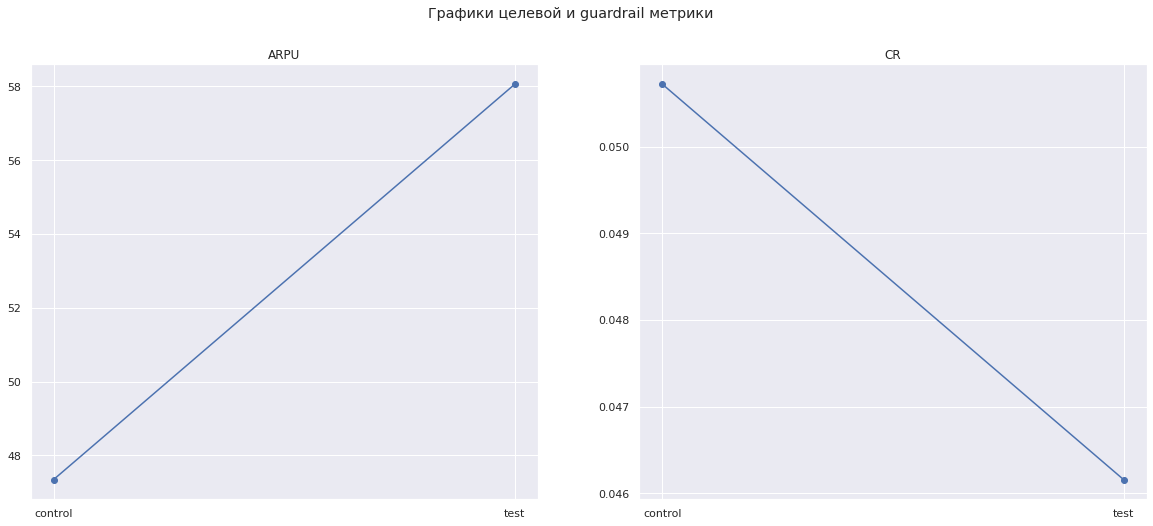

In [5]:
plot_all_metrics('2_groups.csv', '2_group_add.csv', '2_active_studs.csv', '2_checks.csv')

Как видно функция работает корректно.